In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

# Keras Sequential Model
from keras.models import Sequential

# Importing all the different layers and optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from keras.optimizers import Adam

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
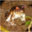

In [4]:
X_train[0]

In [5]:
y_train[0]

array([6], dtype=uint8)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
num_classes = 10

# creating a list of category names in alphabetical order
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

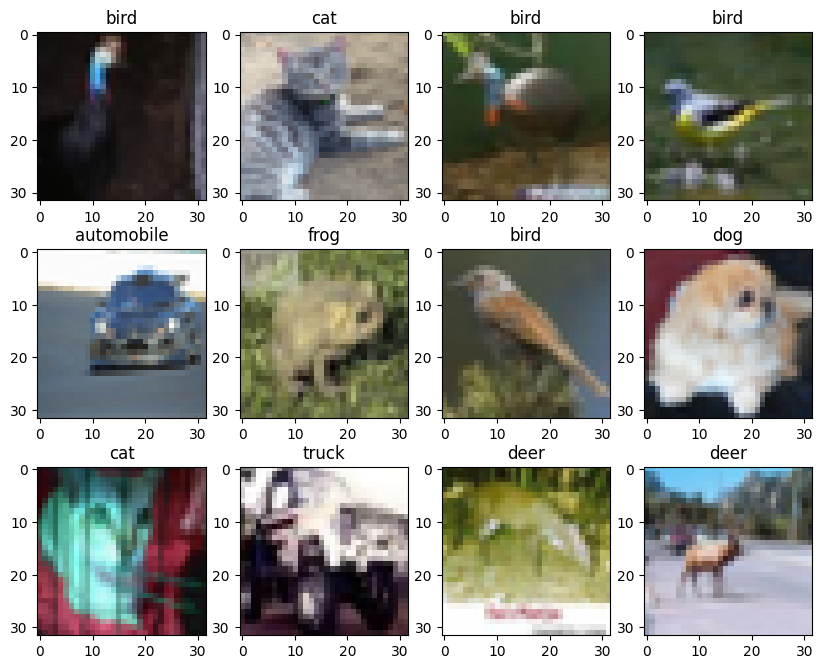

In [8]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 8))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [9]:
# Normalizing the image pixels
X_train_normalized = X_train/255
X_test_normalized = X_test/255

In [10]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [11]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [12]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same')) # must add stride =(1,1) to have padding= same work,  because pooling (2,2) overrides the padding = same

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(10, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# printing the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [14]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=15,
            validation_split=0.1
)

Epoch 1/10
1407/1407 [==============================] - 14s 6ms/step - loss: 1.5299 - accuracy: 0.4443 - val_loss: 1.2747 - val_accuracy: 0.5394
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1492 - accuracy: 0.5939 - val_loss: 1.0300 - val_accuracy: 0.6378
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0001 - accuracy: 0.6475 - val_loss: 0.9664 - val_accuracy: 0.6724
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9098 - accuracy: 0.6803 - val_loss: 0.9647 - val_accuracy: 0.6676
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8478 - accuracy: 0.7029 - val_loss: 0.8451 - val_accuracy: 0.7106
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7906 - accuracy: 0.7222 - val_loss: 0.8593 - val_accuracy: 0.7110
Epoch 7/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.7375 - accuracy: 0.7399 - val_loss: 0.8487 - val_accuracy

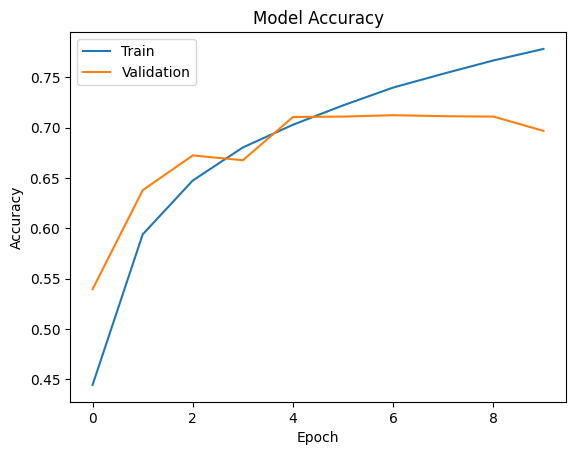

In [15]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
model_1.evaluate(X_test_normalized, y_test_encoded)

313/313 [==============================] - 1s 3ms/step - loss: 0.9551 - accuracy: 0.6801


[0.955122172832489, 0.6801000237464905]

Model 2

In [17]:
#Clearing backend
from keras import backend
backend.clear_session()

In [18]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [19]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(64, activation='relu'))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(10, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#printing the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                   

In [21]:
# Fitting the model
history_2 = model_2.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_split=0.1
)

Epoch 1/10
1407/1407 [==============================] - 17s 9ms/step - loss: 1.6584 - accuracy: 0.3868 - val_loss: 1.3303 - val_accuracy: 0.5166
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2230 - accuracy: 0.5601 - val_loss: 1.0909 - val_accuracy: 0.6042
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0293 - accuracy: 0.6340 - val_loss: 0.8931 - val_accuracy: 0.6828
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9127 - accuracy: 0.6773 - val_loss: 0.8821 - val_accuracy: 0.6984
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8414 - accuracy: 0.7034 - val_loss: 0.8005 - val_accuracy: 0.7242
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7793 - accuracy: 0.7264 - val_loss: 0.8036 - val_accuracy: 0.7194
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7267 - accuracy: 0.7431 - val_loss: 0.7625 - val_ac

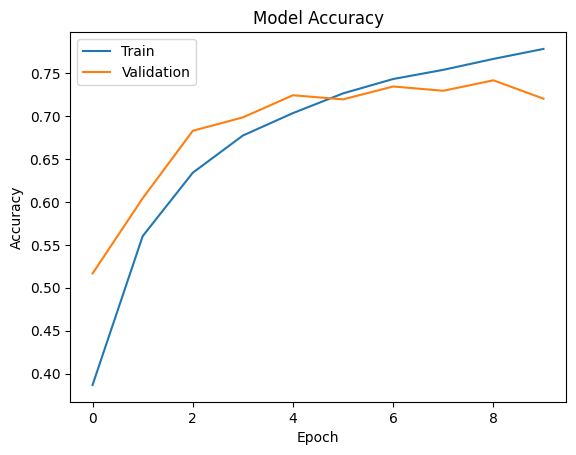

In [22]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
model_2.evaluate(X_test_normalized, y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.8596 - accuracy: 0.7122


[0.8595813512802124, 0.7121999859809875]

In [24]:
#Making predictions on the test data
y_pred_test = model_2.predict(X_test_normalized)

#Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.73      0.78      0.76      1000
           1       0.82      0.91      0.86      1000
           2       0.68      0.58      0.62      1000
           3       0.48      0.56      0.51      1000
           4       0.70      0.58      0.64      1000
           5       0.59      0.65      0.62      1000
           6       0.91      0.61      0.73      1000
           7       0.73      0.79      0.76      1000
           8       0.88      0.78      0.83      1000
           9       0.72      0.89      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



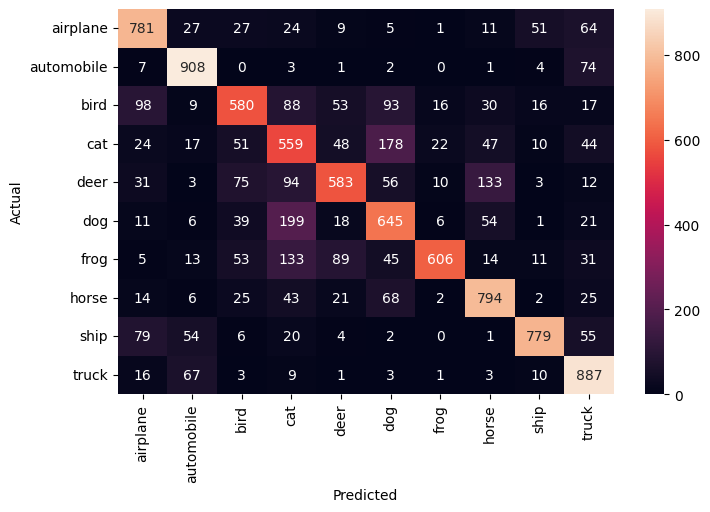

In [25]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

           0       0.73      0.78      0.76      1000
           1       0.82      0.91      0.86      1000
           2       0.68      0.58      0.62      1000
           3       0.48      0.56      0.51      1000
           4       0.70      0.58      0.64      1000
           5       0.59      0.65      0.62      1000
           6       0.91      0.61      0.73      1000
           7       0.73      0.79      0.76      1000
           8       0.88      0.78      0.83      1000
           9       0.72      0.89      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



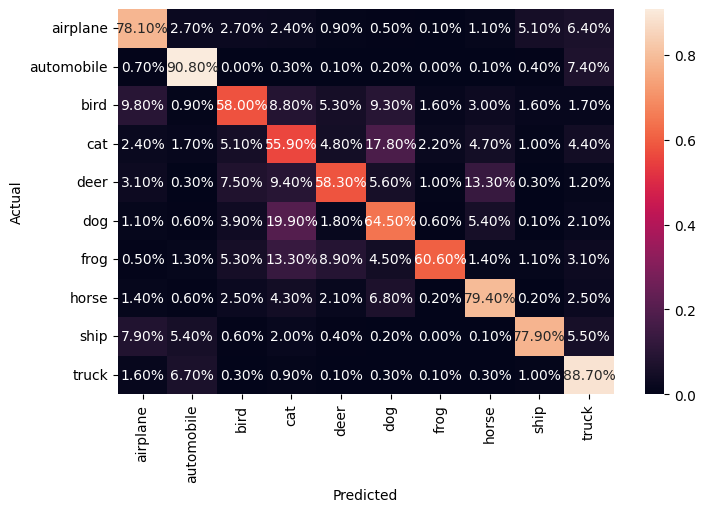

In [26]:
# Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

# Plotting the heatmap using confusion matrix with percentages
cm = confusion_matrix(y_test, y_pred_test_classes)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]  # Convert counts to percentages

plt.figure(figsize=(8,5))
sns.heatmap(cm_percent, annot=True, fmt='.2%', xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

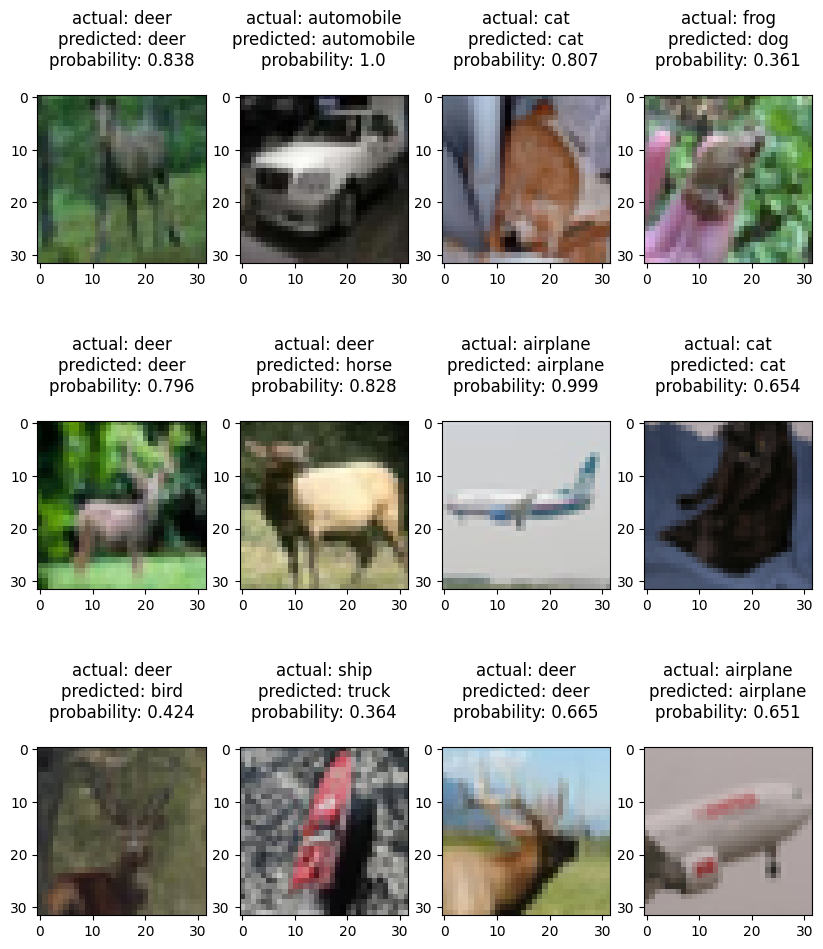

In [28]:
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 12))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()